In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('creditcard.csv')

In [ ]:
dataset.shape

(19898, 31)

In [ ]:
dataset.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
19893  False  False  False  False  False  False  False  False  False  False   
19894  False  False  False  False  False  False  False  False  False  False   
19895  False  False  False  False  False  False  False  False  False  False   
19896  False  False  False  False  False  False  False  False  False  False   
19897  False  False  False  False  False  False  False  False  False  False   

       ...    V21    V22    V23    V24    V25    V26    V27    V28  Amount  \
0      ...  False  False  False  False  False  False  False  False   False   
1      ...  False  False  False  False  False  False  False  False   False   
2      ...  False  False  False  False  False  False  False  False   False   
3      ...  False  False  False  False  False  False  False  False   False   
4      ...  False  False  False  False  False  False  False  False   False   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
19893  ...  False  False  False  False  False  False  False  False   False   
19894  ...  False  False  False  False  False  False  False  False   False   
19895  ...  False  False  False  False  False  False  False  False   False   
19896  ...  False  False  False  False  False  False  False  False   False   
19897  ...   True   True   True   True   True   True   True   True    True   

       Class  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
19893  False  
19894  False  
19895  False  
19896  False  
19897   True  

[19898 rows x 31 columns]>

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
pd.value_counts(dataset['Class'])

Class
0.0    19812
1.0       85
Name: count, dtype: int64

<Axes: ylabel='count'>

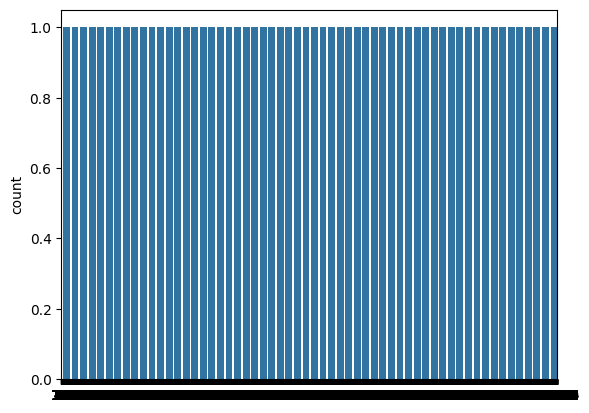

In [ ]:
sns.countplot(dataset['Class'])

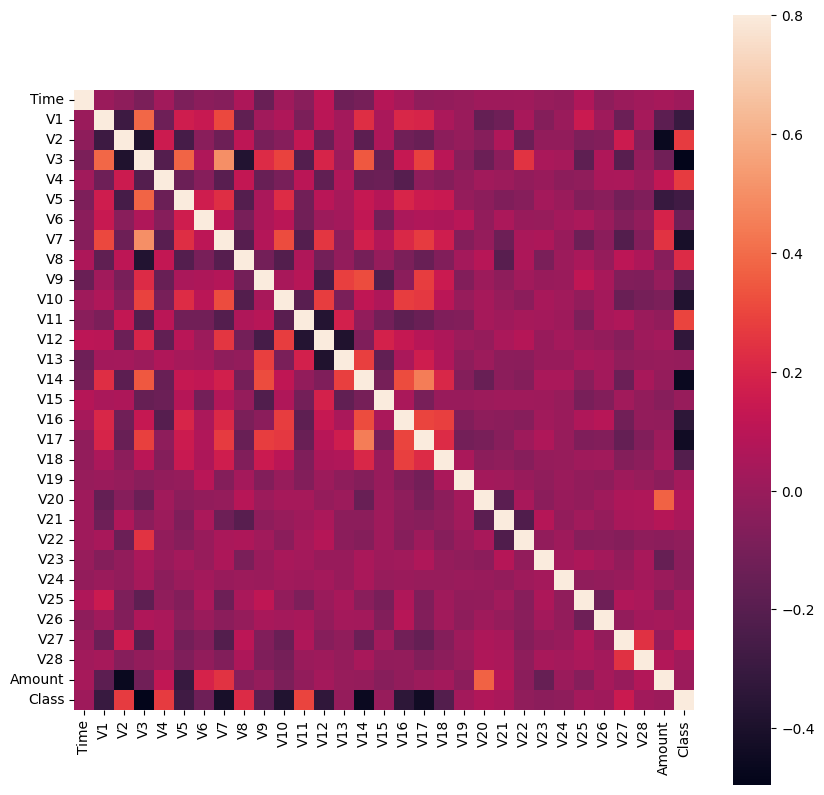

In [ ]:
corrmat = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

In [ ]:
len(dataset[dataset['Class']==0]) #valid transactions

19812

In [ ]:
len(dataset[dataset['Class']==1]) #fraud transactions

85

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
#convert imbalaced dataset to balanced
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

y_no_nan = y[~np.isnan(y)]
X_no_nan = X[~np.isnan(y)]
X_res, y_res = ros.fit_resample(X_no_nan,y_no_nan)

In [ ]:
X.shape

(19898, 30)

In [ ]:
X_res.shape


(39624, 30)

In [ ]:
from collections import Counter
print(Counter(y))
print(Counter(y_res))

Counter({0.0: 19812, 1.0: 85, nan: 1})
Counter({0.0: 19812, 1.0: 19812})


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape


(27736, 30)

In [ ]:
y_train.shape

(27736,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 641, random_state=0)
classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=641, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
n_errors = (y_pred != y_test).sum()

In [ ]:
n_errors

1

In [ ]:
y_test.shape

(11888,)

0.9999158815612382


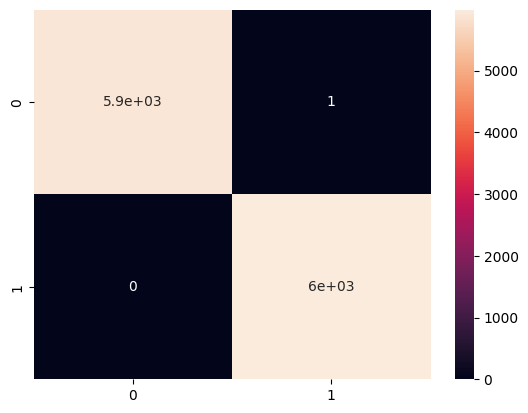

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test , y_pred))

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9998330272165638

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5900
         1.0       1.00      1.00      1.00      5988

    accuracy                           1.00     11888
   macro avg       1.00      1.00      1.00     11888
weighted avg       1.00      1.00      1.00     11888

